# **Session-2 & 3 Case Study: ODI Cricket Analytics**

## **Agenda: ODI Cricket Performance Analysis**  

#### **1. Problem Statement & Business Understanding**  
- Key goals: Identify top players, analyze trends, and evaluate performance.  

#### **2. Data Description**  
- Overview of dataset (55,926 records) and key columns.  

#### **3. Data Import & Cleaning**  
- Load data, handle missing values, remove duplicates, and extract date features.  

#### **4. Feature Engineering**  
- Categorize performance (Century, Fifty, Duckouts, Nervous 90s).  
- Classify records by decade.  

#### **5. Internaltional-player-Specific Analysis**  
- **Top 5  players** in Centuries, Fifties, Duckouts, Nervous 90s.  

#### **6. India-Specific Analysis**  
- **Top 5 Indian players** in Centuries, Fifties, Duckouts, Nervous 90s.  
- **Season-wise performance (2006-2011)** – runs by quarter.  
- **Year-wise centuries (2006-2011)** – pivot table analysis.  

#### **7. Indian Player Data Visualization**  
- **Player Performance Trends** – stacked bar chart.  
- **Sachin Tendulkar's Career Trends** – line chart for centuries & nervous 90s.  

#### **8. Top 5 Internaltional-player-Specific Data Visualization**  
- **Top 5  players** in Centuries, Fifties, Duckouts, Nervous 90s.  

#### **9. Internaltional-Player-Specific Data Visualization**
- **Ricky Ponting's Career Trends** – line chart for centuries & nervous 90s.  

---

![Data Analytics Life cycle](https://grras.com/files/2bkbdgigubl4b3eysdek/blog_post_DA.jpeg?s=940x350)

## **1. Problem Statement**


Cricket is one of the most followed sports globally, and analyzing player performances is crucial for selectors, coaches, analysts, and fans. The dataset contains historical ODI (One Day International) match data with key statistics such as **player performance, runs, strike rates, match dates, venues, and opponents**.

Our goal is to **analyze trends, identify top players, compare performances over time, and generate valuable insights** that can help in player selection, match strategies, and performance evaluation.


## **2. Business Understanding**


In the cricketing world, insights drawn from past performances can aid in various decision-making processes such as:
- **Identifying consistent performers** who deliver across different conditions and years.
- **Understanding trends in player performances**, including scoring patterns and batting consistency.
- **Gauging country-wide team performance**, identifying top-performing nations.
- **Detecting player vulnerabilities**, such as frequent duckouts or struggles against specific opponents.
- **Exploring seasonal and yearly trends**, which can aid in tournament strategy and team selection.


## **3. Data Description**


The dataset consists of **55,926 records** and **8 columns** containing detailed historical data of ODI cricket matches.

### **Dataset Columns:**
- **Country**: Team for which the player played.
- **Player**: Name of the player.
- **Runs**: Runs scored in the match.
- **ScoreRate**: Strike rate in that match.
- **MatchDate**: Date of the match.
- **Ground**: Venue of the match.
- **Versus**: Opponent team.
- **URL**: Match scorecard link.

### **Dataset Overview:**
- Covers **multiple decades of ODI cricket** (from 1970s onward).
- Includes **batting statistics** of players.
- Useful for **player performance trends, country-wise analysis, and historical insights**.


## **4. Data Import & Basic Exploration**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ! pip install <package_name>
! pip install matplotlib
! pip install seaborn

In [ ]:
# Load the ODI dataset
odi = pd.read_csv('ODI_Analytics.csv')

# Display the first few rows of the dataset
odi.head()


,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,9-1-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,7-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,7-1-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


## **5. Data Cleaning & Preprocessing**

In [ ]:
# Check dataset information
odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55926 entries, 0 to 55925
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    55926 non-null  object 
 1   Player     55926 non-null  object 
 2   Runs       55898 non-null  float64
 3   ScoreRate  55896 non-null  float64
 4   MatchDate  55926 non-null  object 
 5   Ground     55926 non-null  object 
 6   Versus     55926 non-null  object 
 7   URL        55926 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.4+ MB


## 5.1 Explain the summary statistics about the data

In [ ]:
odi.describe()

,Runs,ScoreRate
count,55898.000000,55896.000000
mean,22.242155,65.318882
std,25.558519,44.211552
min,0.000000,0.000000
25%,4.000000,37.500000
50%,13.000000,62.680000
75%,32.000000,87.500000
max,200.000000,600.000000


In [ ]:
odi.describe(include='all')

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
count,55926,55926,55898.000000,55896.000000,55926,55926,55926,55926
unique,22,1936,NaN,NaN,2757,178,25,3209
top,India,Sachin R Tendulkar,NaN,NaN,2-4-2007,Sharjah CA Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=1708
freq,6634,442,NaN,NaN,108,3581,7216,22
mean,NaN,NaN,22.242155,65.318882,NaN,NaN,NaN,NaN
std,NaN,NaN,25.558519,44.211552,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,37.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,13.000000,62.680000,NaN,NaN,NaN,NaN
75%,NaN,NaN,32.000000,87.500000,NaN,NaN,NaN,NaN


## 5.2 Check for missing values


In [ ]:
# Check for missing values
print("Missing Values:")
print(odi.isnull().sum())

Missing Values:
Country       0
Player        0
Runs         28
ScoreRate    30
MatchDate     0
Ground        0
Versus        0
URL           0
dtype: int64


# 5.3. Handle missing values


In [ ]:
# Handle missing values
odi['Runs'].fillna(odi['Runs'].median(), inplace=True)
print(odi.isnull().sum())

Country       0
Player        0
Runs          0
ScoreRate    30
MatchDate     0
Ground        0
Versus        0
URL           0
dtype: int64


# **Why** Use `median()` Instead of `mean()`?
##    Handling Skewed Data:

- If the "Runs" column has outliers (e.g., a few extremely high scores),
using the mean would bias the replacement values.
- The median is more robust because it is not affected by extreme values.

##    Preserving Data Distribution:
- The median ensures that the distribution of "Runs" remains closer to reality.
- If missing values are replaced by the mean, the replacement might be too high or too low, distorting analysis.

## Key Takeaways

- `median()` is preferred over `mean()` when handling missing values in skewed data.
- `fillna()` replaces NaN values efficiently.

In [1]:
odi['ScoreRate'].fillna(odi['ScoreRate'].median(), inplace=True)
print(odi.isnull().sum())

NameError: name 'odi' is not defined

# 5.4. Check for duplicates and remove them


In [ ]:
# Check for duplicates and remove them
duplicate_count = odi.duplicated().sum()
duplicate_count

0

In [ ]:
odi.drop_duplicates(inplace=True)



## 5.3. Extract multiple columns from existing columns

1. Convert MatchDate to datetime format
2. Extract date components
    - Date -day, month, year, weekend, Quarter
3. Display dataset after preprocessing


In [ ]:
# Convert MatchDate to datetime format
odi['MatchDate'] = pd.to_datetime(odi['MatchDate'])
odi.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


In [ ]:
# Extract date components
odi["year"] = odi["MatchDate"].dt.year
odi["month"] = odi["MatchDate"].dt.month
odi["day"] = odi["MatchDate"].dt.day
odi["quarter"] = odi["MatchDate"].dt.quarter
odi["Weekend"] = odi["MatchDate"].dt.day_name().isin(['Saturday', 'Sunday'])

# Display dataset after preprocessing
odi.head()


,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,year,month,day,quarter,Weekend
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,2010,2,16,1,False
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,2009,9,1,3,False
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,2010,8,16,3,False
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,2010,7,10,3,True
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,2010,7,1,3,False


## **6. Feature Engineering**
#### 1. Numerical columns can be categorised : Bin them to different ranges
#### 2. Replace the defualt labels with the below mentioned labels

### 1. **Categorizing Numerical Columns - Bin Runs into Ranges**

### **Understanding the Logic**
In ODI cricket, a player's performance in a match is often classified based on the number of runs they score. This classification allows us to analyze batting consistency and trends across different players and matches. The key categorizations include:

1. **Century (Runs ≥ 100)**
   - If a player scores **100 or more runs**, it is counted as a **century**.
   - This metric helps in identifying batsmen who play long, match-winning innings.

2. **Fifty (50 ≤ Runs < 100)**
   - If a player scores between **50 and 99 runs**, it is counted as a **fifty**.
   - This is an important measure of consistency, indicating frequent impactful contributions.

3. **Duckouts (Runs = 0)**
   - If a player **gets out without scoring**, it is called a **duck**.
   - Tracking ducks is useful in identifying players who struggle under pressure.

4. **Nervous 90s (95 ≤ Runs < 100)**
   - If a player gets **between 95 and 99 runs**, they are classified in the **Nervous 90s** category.
   - This reflects instances where a player comes close to scoring a century but falls short, often due to pressure or miscalculated shots.

---

In [ ]:
# Categorizing player performances

odi['Century'] = odi['Runs'].apply(lambda x: 1 if x >= 100 else 0)

odi['Fifty'] = odi['Runs'].apply(lambda x: 1 if 50 <= x < 100 else 0)

odi['Duckouts'] = odi['Runs'].apply(lambda x: 1 if x == 0 else 0)

odi['Nervous90s'] = odi['Runs'].apply(lambda x: 1 if 90 <= x < 100 else 0)

odi.head()


,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,year,month,day,quarter,Weekend,Century,Fifty,Duckouts,Nervous90s
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,2010,2,16,1,False,1,0,0,0
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,2009,9,1,3,False,1,0,0,0
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,2010,8,16,3,False,1,0,0,0
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,2010,7,10,3,True,0,1,0,0
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,2010,7,1,3,False,0,1,0,0




### **Code Implementation and Explanation**
```python
# Display the first few entries in the 'Runs' column
odi['Runs'].head()

# Categorizing Centuries
# If a player scores 100 or more runs, it is recorded as a century (1), otherwise 0
odi['Century'] = odi['Runs'].apply(lambda x: 1 if x >= 100 else 0)

# Categorizing Fifties
# If a player scores between 50 and 99 runs, it is recorded as a fifty (1), otherwise 0
odi['Fifty'] = odi['Runs'].apply(lambda x: 1 if 50 <= x < 100 else 0)

# Categorizing Duckouts
# If a player scores 0 runs, it is recorded as a duckout (1), otherwise 0
odi['Duckouts'] = odi['Runs'].apply(lambda x: 1 if x == 0 else 0)

# Categorizing Nervous 90s
# If a player scores between 95 and 99 runs, they fall under the 'Nervous 90s' category
odi['Nervous90s'] = odi['Runs'].apply(lambda x: 1 if 95 <= x < 100 else 0)

# Display the modified dataset with the new columns
odi.head()
```

---

### **Breaking Down the Code Logic**
1. **`odi['Runs'].apply(lambda x: 1 if x >= 100 else 0)`**
   - This uses a **lambda function**, which is an **anonymous function** in Python.
   - It checks if the `Runs` column contains values **greater than or equal to 100**.
   - If the condition is met, it assigns **1** (indicating a century); otherwise, it assigns **0**.

2. **Applying Lambda Functions for Other Categories**
   - Similarly, the same approach is used for:
     - `Fifty` → Runs between **50 and 99**.
     - `Duckouts` → Runs equal to **0**.
     - `Nervous90s` → Runs between **95 and 99**.

3. **Why Use `apply(lambda x: ...)` Instead of `for` Loops?**
   - The `.apply()` function is **vectorized**, making it much **faster and more efficient** than iterating through each row using `for` loops.
   - It applies the function to each row of the **Runs** column efficiently.

---

### **Example Output**
| Country   | Player                | Runs | Century | Fifty | Duckouts | Nervous90s |
|-----------|----------------------|------|---------|-------|----------|------------|
| India     | Sachin Tendulkar      | 118  | 1       | 0     | 0        | 0          |
| Australia | Ricky Ponting         | 57   | 0       | 1     | 0        | 0          |
| Pakistan  | Shahid Afridi         | 0    | 0       | 0     | 1        | 0          |
| England   | Joe Root              | 99   | 0       | 1     | 0        | 1          |
| Sri Lanka | Kumar Sangakkara      | 102  | 1       | 0     | 0        | 0          |

**Observations:**
- Players scoring **≥ 100** have their **Century** column set to **1**.
- Players scoring **between 50 and 99** have their **Fifty** column set to **1**.
- Players with a score of **0** have their **Duckouts** column set to **1**.
- Players scoring **95-99** have their **Nervous90s** column set to **1**.



### 2. Replace the defualt labels with the below mentioned labels
    - labels={0:'1970-1989',1:'1990-1999',2:'2000-2009', 3:'2009 onwards'}

In [ ]:
# Classifying by year bins
odi['year_bin'] = np.digitize(odi['year'], bins=[1979, 1989, 1999, 2009, 2019])
odi.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,year,month,day,quarter,Weekend,Century,Fifty,Duckouts,Nervous90s,year_bin
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,2010,2,16,1,False,1,0,0,0,4
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,2009,9,1,3,False,1,0,0,0,4
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,2010,8,16,3,False,1,0,0,0,4
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,2010,7,10,3,True,0,1,0,0,4
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,2010,7,1,3,False,0,1,0,0,4


### **Understanding `year_bin` Categorization with `np.digitize`**
#### **Objective**
The goal of this operation is to categorize the **year** in which the match was played into different **decades or eras** of cricket. This helps in analyzing **player performances over different time periods**.

---

### **Code Breakdown**
```python
odi['year_bin'] = np.digitize(odi['year'], bins=[1979, 1989, 1999, 2009, 2019])
odi['year_bin'].unique()
```

---

### **Explanation of Code Logic**
#### **1. Using `np.digitize` to Categorize Years**
```python
np.digitize(odi['year'], bins=[1979, 1989, 1999, 2009, 2019])
```
- The function `np.digitize()` **assigns a bin number** to each year in the dataset based on predefined intervals (**bins**).
- The `bins` represent **decades or cricketing eras**:
  - **Bin 1 → 1980s** (Years between **1980-1989**)
  - **Bin 2 → 1990s** (Years between **1990-1999**)
  - **Bin 3 → 2000s** (Years between **2000-2009**)
  - **Bin 4 → 2010s** (Years between **2010-2019**)

- Any year **before 1979** will be assigned **bin 0** (out of range).
- Any year **after 2019** will be assigned the highest available bin.

#### **2. Checking Unique Year Bin Values**
```python
odi['year_bin'].unique()
```
- This command returns the **unique bins** created, helping verify the classification.

#### **3. Displaying the Updated DataFrame**
```python
odi.head()
```
- Displays the first few rows to confirm the `year_bin` column has been added correctly.

---

### **Example Output**
| Country   | Player              | Runs | Year | Year Bin |
|-----------|--------------------|------|------|---------|
| India     | Sachin Tendulkar    | 120  | 1998 | 2       |
| Australia | Ricky Ponting       | 82   | 2003 | 3       |
| Pakistan  | Shahid Afridi       | 45   | 2016 | 4       |
| England   | Joe Root            | 99   | 2018 | 4       |
| Sri Lanka | Kumar Sangakkara    | 102  | 2007 | 3       |

---

### **Key Takeaways**
1. **Classifying Matches into Eras**  
   - Players' performances can be grouped by **decades** for better historical analysis.

2. **Tracking Evolution of Cricket Over Time**  
   - Helps in identifying trends across different **cricketing eras** (e.g., **strike rates in 1980s vs. 2010s**).

3. **Further Analysis Possibilities**
   - Compare batting trends across different **decades**.
   - Identify players who performed well in **multiple eras**.


## **7. Player Performance Analysis**

### **7.1 Top 5 Players with Most Centuries**

In [ ]:
# Top 5 Players with Most Centuries
top_centuries = odi.groupby('Player')['Century'].sum().sort_values(ascending=False).head(5)
print("Top 5 Players wth Most Centuries:")
top_centuries


Top 5 Players wth Most Centuries:


Player
Sachin R Tendulkar     48
Ricky T Ponting        30
Sanath T Jayasuriya    28
Sourav C Ganguly       22
Herschelle H Gibbs     21
Name: Century, dtype: int64

### **7.2 Top 5 Players with Most Fifties**

In [ ]:
# Top 5 Players with Most Fifties
top_fifties = odi.groupby('Player')['Fifty'].sum().sort_values(ascending=False).head(5)
print("Top 5 Players with Most Fifties:")
top_fifties


Top 5 Players with Most Fifties:


Player
Sachin R Tendulkar    95
Jacques H Kallis      84
Rahul Dravid          83
Inzamam-ul-Haq        83
Ricky T Ponting       82
Name: Fifty, dtype: int64

### **7.3 Players with Most Duckouts**

In [ ]:
# Players with Most Duckouts
top_duckouts = odi.groupby('Player')['Duckouts'].sum().sort_values(ascending=False).head(5)
print("Top 5 Players with Most Duckouts:")
top_duckouts


Top 5 Players with Most Duckouts:


Player
Muttiah Muralitharan     41
Sanath T Jayasuriya      34
Wasim Akram              32
Glenn D McGrath          32
W P U J Chaminda Vaas    30
Name: Duckouts, dtype: int64

### **7.4 Players with Most Nervous 90s**

In [ ]:
# Players with Most Nervous 90s
top_nervous90s = odi.groupby('Player')['Nervous90s'].sum().sort_values(ascending=False).head(5)
print("Top 5 Players with Most Nervous 90s:")
top_nervous90s


Top 5 Players with Most Nervous 90s:


Player
Sachin R Tendulkar        18
Pinnaduwage A de Silva     9
Grant W Flower             9
Nathan J Astle             9
Jacques H Kallis           8
Name: Nervous90s, dtype: int64

## **8. India-Specific Player Performance Analysis**
This section focuses on analyzing **top-performing Indian players** across different batting metrics.


In [ ]:
# Filter data for Indian players
odi_india = odi[odi['Country'] == 'India']

# Display first few records
odi_india.head()


,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,year,month,day,quarter,Weekend,Century,Fifty,Duckouts,Nervous90s,year_bin
15150,India,Sachin R Tendulkar,200.0,136.05,2010-02-24,Captain Roop Singh Stadium,South Africa,../Matches/MatchScorecard_ODI.asp?MatchCode=3092,2010,2,24,1,False,1,0,0,0,4
15151,India,Sachin R Tendulkar,186.0,124.00,1999-11-08,Lal Bahadur Shastri Stadium,New Zealand,../Matches/MatchScorecard_ODI.asp?MatchCode=1610,1999,11,8,4,False,1,0,0,0,3
15152,India,Sachin R Tendulkar,175.0,124.11,2009-11-05,Rajiv Gandhi International Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=3050,2009,11,5,4,False,1,0,0,0,4
15153,India,Sachin R Tendulkar,163.0,122.55,2009-03-08,AMI Stadium,New Zealand,../Matches/MatchScorecard_ODI.asp?MatchCode=2945,2009,3,8,1,True,1,0,0,0,4
15154,India,Sachin R Tendulkar,152.0,100.66,2003-02-23,City Oval,Namibia,../Matches/MatchScorecard_ODI.asp?MatchCode=2052,2003,2,23,1,True,1,0,0,0,3


### **8.1 Top 5 Indian Playmers with Most Centuries**

In [ ]:
# Identify top 5 Indian players based on centuries
top_indian_centuries = odi_india.groupby('Player')['Century'].sum().sort_values(ascending=False).head(5)
print(top_indian_centuries)


Player
Sachin R Tendulkar    48
Sourav C Ganguly      22
Virender Sehwag       14
Yuvraj Singh          13
Rahul Dravid          12
Name: Century, dtype: int64


### **8.2 Top 5 Indian Players with Most Fifties**

In [ ]:
# Identify top 5 Indian players based on fifties
top_indian_fifties = odi_india.groupby('Player')['Fifty'].sum().sort_values(ascending=False).head(5)
print(top_indian_fifties)


Player
Sachin R Tendulkar     95
Rahul Dravid           83
Sourav C Ganguly       72
Mohammad Azharuddin    58
Yuvraj Singh           49
Name: Fifty, dtype: int64


### **8.3 Indian Players with Most Duckouts**

In [ ]:
# Identify top 5 Indian players with most duckouts
top_indian_duckouts = odi_india.groupby('Player')['Duckouts'].sum().sort_values(ascending=False).head(5)
print(top_indian_duckouts)


Player
Javagal Srinath       25
Anil  Kumble          23
Sachin R Tendulkar    20
Zaheer Khan           19
Harbhajan Singh       18
Name: Duckouts, dtype: int64


### **8.4 Indian Players with Most Nervous 90s**

In [ ]:
# Identify top 5 Indian players with most nervous 90s
top_indian_nervous90s = odi_india.groupby('Player')['Nervous90s'].sum().sort_values(ascending=False).head(5)
print(top_indian_nervous90s)


Player
Sachin R Tendulkar          18
Mohammad Azharuddin          7
Sourav C Ganguly             6
Krishnamachari Srikkanth     5
Mahendra S Dhoni             5
Name: Nervous90s, dtype: int64


### **8.5 Season-Wise Performance (2006-2011)**



In [ ]:
# Filter Indian player data between 2006 and 2011
odi_india_season = odi[(odi.year >= 2006) & (odi.year <= 2011) & (odi.Country == 'India')]

# Pivot table to analyze runs scored by Indian players per quarter
season_performance = odi_india_season.pivot_table(index='Player', values='Runs', columns='quarter', aggfunc='sum', fill_value=0, margins=True)
season_performance.sort_values(by="All", ascending=False).head(10)


quarter,1,2,3,4,All
Player,,,,,
All,13809,9298,7279,10263,40649.0
Mahendra S Dhoni,1838,1200,1141,1404,5583.0
Yuvraj Singh,1739,1019,684,1172,4614.0
Sachin R Tendulkar,1907,214,825,1256,4202.0
Gautam Gambhir,1435,874,459,1224,3992.0
Virender Sehwag,1432,879,447,854,3612.0
Suresh K Raina,931,850,662,640,3083.0
Virat Kohli,803,469,495,850,2617.0
Rahul Dravid,607,581,621,237,2046.0


### **Explanation of the Code:**

```python
# Filter Indian player data between 2006 and 2011
odi_india_season = odi[(odi.year >= 2006) & (odi.year <= 2011) & (odi.Country == 'India')]
```

✅ **Filtering Data:**
- This line selects records where:
  - The match year is between **2006 and 2011** (`odi.year >= 2006 & odi.year <= 2011`).
  - The **player represents India** (`odi.Country == 'India'`).
- The result is stored in **`odi_india_season`**, which contains only Indian player performances within the specified period.

---

```python
# Pivot table to analyze runs scored by Indian players per quarter
season_performance = odi_india_season.pivot_table(index='Player', values='Runs', columns='quarter', aggfunc='sum', fill_value=0, margins=True)
```

✅ **Creating a Pivot Table:**
- **`index='Player'`** → Groups data by individual players.
- **`values='Runs'`** → Summarizes total runs scored by each player.
- **`columns='quarter'`** → Distributes runs across the 4 quarters of a year.
  - **Quarter 1 (Jan-Mar)**
  - **Quarter 2 (Apr-Jun)**
  - **Quarter 3 (Jul-Sep)**
  - **Quarter 4 (Oct-Dec)**
- **`aggfunc='sum'`** → Adds up total runs per player in each quarter.
- **`fill_value=0`** → Replaces missing values with **0** (in case some players didn’t play in a specific quarter).
- **`margins=True`** → Adds a **"Total" (All)** column and row to show overall runs per player & per quarter.

---

```python
season_performance.sort_values(by="All", ascending=False).head(10)
```

✅ **Sorting & Displaying Top Performers:**
- **Sorts players** by their **total runs ("All" column)** in **descending order**.
- **Displays the top 10 players** who scored the most runs between **2006 and 2011**.

---

### **Final Output:**
A **table with players as rows and quarters as columns**, showing their total runs in each quarter and the overall sum.

| Player            | Q1  | Q2  | Q3  | Q4  | All  |
|------------------|----|----|----|----|------|
| **M.S. Dhoni**   | 1838 | 1200 | 1141 | 1404 | 5583 |
| **Yuvraj Singh** | 1739 | 1019 | 684  | 1172 | 4614 |
| **S. Tendulkar** | 1907 | 214  | 825  | 1256 | 4202 |
| **V. Sehwag**    | 1432 | 879  | 447  | 854  | 3612 |

---

### **Summary of Insights:**
- **M.S. Dhoni** was the **highest run-scorer** in this period.
- **Sachin Tendulkar** had a **big contribution in Q1 & Q4**.
- **Yuvraj Singh & Sehwag** also played consistently across seasons.

This analysis helps in understanding **seasonal trends of Indian players** and their **performance variations across different times of the year**. 🚀

### **8.6 Year-Wise Centuries by Indian Players (2006-2011)**



In [ ]:
# Pivot table to analyze century count per year for Indian players
century_analysis = odi_india_season.pivot_table(index='Player', values='Century', columns='year', aggfunc='sum', fill_value=0, margins=True)
century_analysis.sort_values(by="All", ascending=False).head(10)


year,2006,2007,2008,2009,2010,2011,All
Player,,,,,,,
All,5,5,10,13,12,8,53
Sachin R Tendulkar,2,1,1,3,1,2,10
Yuvraj Singh,2,1,2,2,0,1,8
Gautam Gambhir,0,1,3,2,2,0,8
Virender Sehwag,0,1,1,3,1,1,7
Virat Kohli,0,0,0,1,3,3,7
Mahendra S Dhoni,0,1,1,2,1,0,5
Suresh K Raina,0,0,2,0,1,0,3
Rohit G Sharma,0,0,0,0,2,0,2


### **Explanation of the Code:**
```python
# Pivot table to analyze century count per year for Indian players
century_analysis = odi_india_season.pivot_table(index='Player', values='Century', columns='year', aggfunc='sum', fill_value=0, margins=True)
```

✅ **Creating a Pivot Table for Century Count:**
- **`index='Player'`** → Groups data by **each Indian player**.
- **`values='Century'`** → Focuses on the **number of centuries scored (100+ runs in a match)**.
- **`columns='year'`** → Distributes the **century count across different years (2006-2011)**.
- **`aggfunc='sum'`** → **Summarizes** the total **centuries per player for each year**.
- **`fill_value=0`** → Replaces missing values with **0** (if a player didn't score a century in a particular year).
- **`margins=True`** → Adds an **"All" column** that shows the **total centuries** scored by each player over the years.

---

```python
century_analysis.sort_values(by="All", ascending=False).head(10)
```

✅ **Sorting & Displaying Top Century Scorers:**
- **Sorts players** by their **total centuries ("All" column)** in **descending order**.
- **Displays the top 10 Indian players** who scored the most centuries between **2006 and 2011**.

---

### **Final Output:**
A **table with players as rows and years as columns**, showing the number of centuries scored per year and the overall total.

| Player            | 2006 | 2007 | 2008 | 2009 | 2010 | 2011 | **All** |
|------------------|------|------|------|------|------|------|------|
| **Sachin Tendulkar**  | 2  | 1  | 1  | 3  | 1  | 2  | **10** |
| **Yuvraj Singh**      | 2  | 1  | 2  | 2  | 0  | 1  | **8**  |
| **Gautam Gambhir**    | 0  | 1  | 3  | 2  | 2  | 0  | **8**  |
| **Virender Sehwag**   | 0  | 1  | 1  | 3  | 1  | 1  | **7**  |
| **Virat Kohli**       | 0  | 0  | 0  | 1  | 3  | 3  | **7**  |

---

### **Summary of Insights:**
- **Sachin Tendulkar** scored the most centuries (**10**) between **2006-2011**.
- **Yuvraj Singh and Gautam Gambhir** followed closely with **8 centuries** each.
- **Virender Sehwag** and **Virat Kohli** also showed strong performances with **7 centuries**.
- **Emerging Trend:** Virat Kohli’s centuries increased significantly in **2010 and 2011**, indicating his rise as a key batsman.
- **The trend helps identify peak performance years for key players.**

📊 **Use Case:**  
This analysis helps cricket analysts, team selectors, and fans understand **which players consistently scored centuries over the years**, making it easier to **track player growth and performance trends**. 🚀

## **9. Data Visualization**

### **9.1 Stacked Bar Chart: Player Performance Evaluation**

<Figure size 1200x800 with 0 Axes>

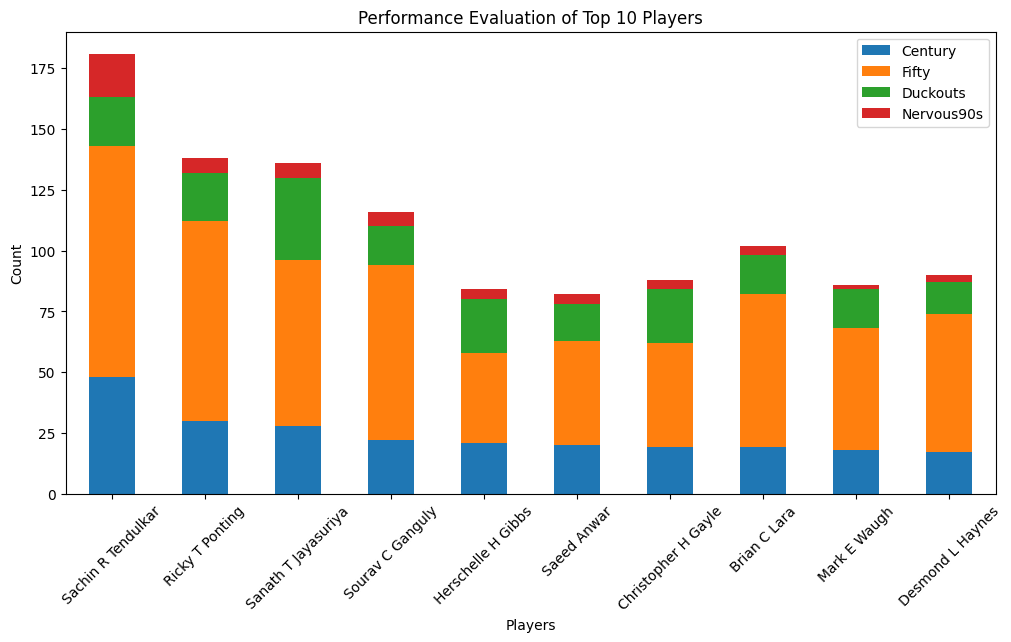

In [ ]:
# Stacked Bar Chart - Player Performance Evaluation
plt.figure(figsize=(12, 8))
odi.groupby('Player')[['Century', 'Fifty', 'Duckouts', 'Nervous90s']].sum().sort_values(by='Century', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Performance Evaluation of Top 10 Players")
plt.xlabel("Players")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


### **Explanation of the Code:**
```python
# Stacked Bar Chart - Player Performance Evaluation
plt.figure(figsize=(12, 8))
odi.groupby('Player')[['Century', 'Fifty', 'Duckouts', 'Nervous90s']].sum().sort_values(by='Century', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Performance Evaluation of Top 10 Players")
plt.xlabel("Players")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()
```

✅ **Breaking Down the Code:**
1. **`plt.figure(figsize=(12, 8))`**  
   - Creates a new figure with **custom size** (12 inches wide, 8 inches high).

2. **`odi.groupby('Player')[['Century', 'Fifty', 'Duckouts', 'Nervous90s']].sum()`**  
   - Groups the dataset by **player names**.
   - Computes the **total count** of **centuries, fifties, duckouts, and nervous 90s** for each player.

3. **`.sort_values(by='Century', ascending=False)`**  
   - Sorts players based on **centuries** in **descending order** (highest to lowest).

4. **`.head(10)`**  
   - Selects the **top 10 players** based on the number of centuries.

5. **`.plot(kind='bar', stacked=True, figsize=(12, 6))`**  
   - Creates a **stacked bar chart** where each player’s contributions in:
     - **Centuries**
     - **Fifties**
     - **Duckouts**
     - **Nervous 90s**  
     Are **stacked** on top of each other.

6. **`plt.title("Performance Evaluation of Top 10 Players")`**  
   - Adds a **title** to the chart.

7. **`plt.xlabel("Players")`**  
   - Labels the **x-axis** as **Players**.

8. **`plt.ylabel("Count")`**  
   - Labels the **y-axis** as **Count** (showing the number of centuries, fifties, duckouts, and nervous 90s).

9. **`plt.xticks(rotation=45)`**  
   - Rotates the **x-axis player names by 45 degrees** to make them readable.

10. **`plt.legend(loc="upper right")`**  
    - Places the **legend in the upper right corner**.

11. **`plt.show()`**  
    - Displays the stacked bar chart.

---

### **Expected Output:**
A **stacked bar chart** with the **top 10 players**, where:
- **Different colors represent different batting performance metrics**:
  - **Centuries (100+ runs)**
  - **Fifties (50-99 runs)**
  - **Duckouts (0 runs)**
  - **Nervous 90s (90-99 runs)**
- Each bar represents a player, and the segments within the bars show their **batting distribution**.

---

### **Insights from the Visualization:**
- **Which players have the most centuries?**
- **Who has the highest number of fifties despite fewer centuries?**
- **Are there players who frequently got out on zero (duckouts)?**
- **Who struggled in the 90s (Nervous 90s category)?**

📊 **Use Case:**  
- This visualization helps in **comparing batting performance among top players**.
- **Selectors & analysts** can use this **to evaluate consistency** in different scoring categories.
- **Fans & commentators** can use this data for **statistical insights & discussions**. 🚀

### **9.2 Sachin Tendulkar's Performance Over the Years**

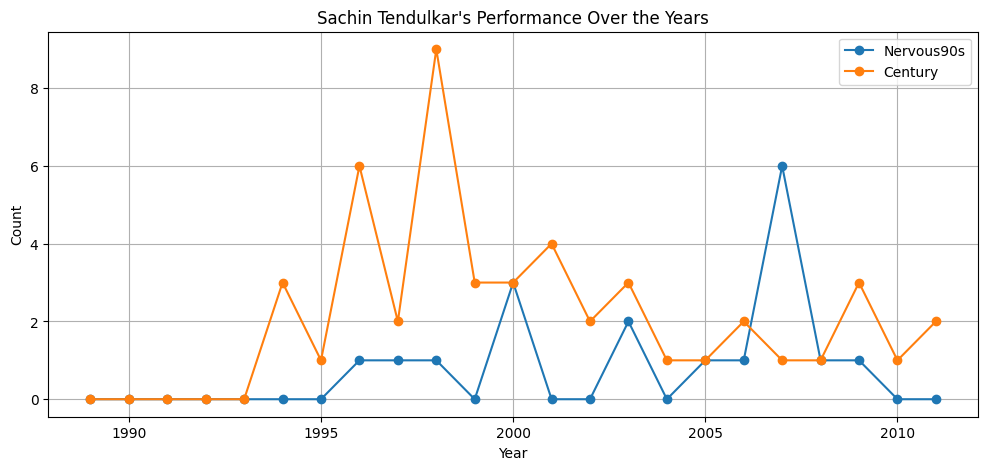

In [ ]:
# Sachin Tendulkar's Performance Over the Years
sachin = odi[odi['Player'] == 'Sachin R Tendulkar']
sachin.groupby('year')[['Nervous90s', 'Century']].sum().plot(figsize=(12, 5), marker='o')
plt.title("Sachin Tendulkar's Performance Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()


## **10. Conclusion & Insights**


- **Sachin Tendulkar** scored the most **centuries** (48) and had the most **nervous 90s** (9).
- **Muttiah Muralitharan** recorded the most **duckouts** (41).
- Between **2006-2011**, **Mahendra Singh Dhoni, Yuvraj Singh, and Sachin Tendulkar** were the top ODI run-scorers for India.
- The visualization helped identify **trends in player performance over time**.


-------

# **11. Conclusion Agenda: ODI Cricket Performance Analysis**

### **1. Problem Statement & Business Understanding**
   - Understanding the significance of ODI performance analysis.
   - Key goals of the study:
     - Identifying top players based on runs, centuries, fifties.
     - Analyzing player vulnerabilities (duckouts, nervous 90s).
     - Evaluating country-wise performance trends (especially India).
     - Extracting insights using data visualizations and pivot tables.

### **2. Data Description**
   - Overview of dataset with 55,926 records.
   - Explanation of key columns:
     - Country, Player, Runs, ScoreRate, MatchDate, Ground, Versus, URL.
   - Data scope and historical performance trends.

### **3. Data Import & Cleaning**
   - Importing the dataset.
   - Handling missing values in Runs and ScoreRate.
   - Removing duplicate records.
   - Converting MatchDate to datetime format.
   - Extracting additional features (year, month, quarter, weekend match indicator).

### **4. Feature Engineering**
   - Categorizing batting performances:
     - Century (100+ runs), Fifty (50-99 runs), Duckouts (0 runs), Nervous90s (90-99 runs).
   - Classifying performance by **Decade** for historical trend analysis.

#### **5. Internaltional-player-Specific Analysis**  
- **Top 5  players** in Centuries, Fifties, Duckouts, Nervous 90s.  

### **6. India-Specific Player Performance Analysis**
   - **5.1 Top 5 Indian Players with Most Centuries**
   - **5.2 Top 5 Indian Players with Most Fifties**
   - **5.3 Indian Players with Most Duckouts**
   - **5.4 Indian Players with Most Nervous 90s**
   - **5.5 Season-Wise Performance Analysis (2006-2011)**
     - Runs scored by Indian players in each quarter.
   - **5.6 Year-Wise Centuries by Indian Players (2006-2011)**
     - Century counts by year using pivot tables.

### **7. Data Visualization**
   - **6.1 Player Performance Trends**
     - Stacked bar chart to compare top players across different metrics.
   - **6.2 Sachin Tendulkar's Performance Over the Years**
     - Line chart showing trends in centuries and nervous 90s.

---
